In [35]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np


In [36]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = train_labels.reshape(-1,)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

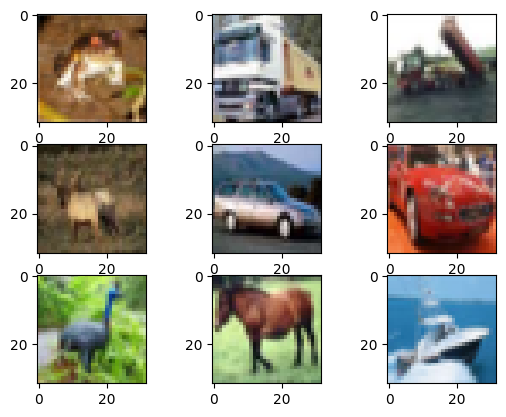

In [37]:
# Plot first few images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i])
plt.show()


In [45]:

def create_model():
    
    model = Sequential()

    # First Convolutional Layer
    model.add(Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Layer
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Fourth Convolutional Layer
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Fifth Convolutional Layer
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))

    # Flattening and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(10, activation='softmax'))

    return model
model.summary()



In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(train_images, train_labels, epochs=19, validation_data=(test_images, test_labels))

Epoch 1/19
1563/1563 [==============================] - 27s 17ms/step - loss: 1.9101 - accuracy: 0.3983 - val_loss: 1.4507 - val_accuracy: 0.5034
Epoch 2/19
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3113 - accuracy: 0.5584 - val_loss: 1.5681 - val_accuracy: 0.5032
Epoch 3/19
1563/1563 [==============================] - 26s 16ms/step - loss: 1.0201 - accuracy: 0.6608 - val_loss: 1.3155 - val_accuracy: 0.5672
Epoch 4/19
1563/1563 [==============================] - 26s 17ms/step - loss: 0.7953 - accuracy: 0.7340 - val_loss: 0.8588 - val_accuracy: 0.7216
Epoch 5/19
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6423 - accuracy: 0.7855 - val_loss: 0.6864 - val_accuracy: 0.7684
Epoch 6/19
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5306 - accuracy: 0.8232 - val_loss: 0.7171 - val_accuracy: 0.7645
Epoch 7/19
1563/1563 [==============================] - 26s 17ms/step - loss: 0.4452 - accuracy: 0.8520 - val_loss: 0.8131 -

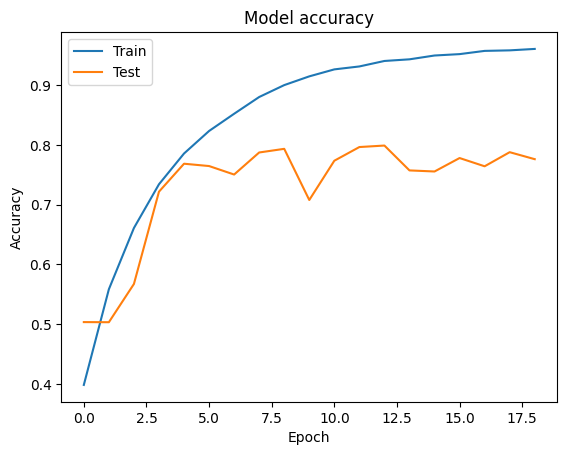

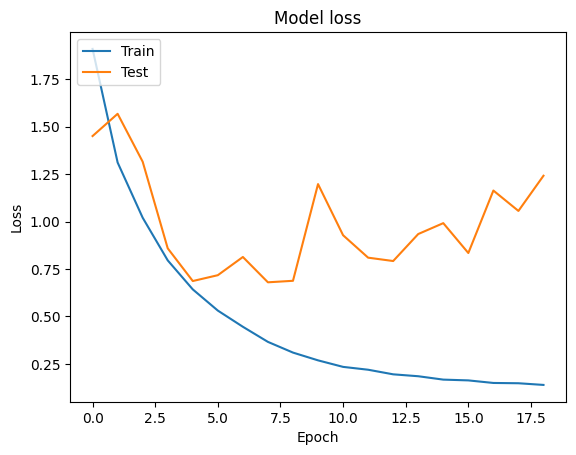

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [42]:
model.save('alexnet_cifar10.h5')

In [52]:
from tensorflow.keras.models import load_model

scores = []

for train_index, test_index in skf.split(train_images, np.argmax(train_labels, axis=1)):
    _, X_val_fold = train_images[train_index], train_images[test_index]
    _, y_val_fold = train_labels[train_index], train_labels[test_index]

    # Load the saved model
    model = load_model('alexnet_cifar10.h5')

    # Evaluate the model
    score = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    scores.append(score)

average_score = np.mean(scores, axis=0)
print(f'Average score across all folds: {average_score}')


Shape of X_val_fold: (10000, 32, 32, 3)
Shape of y_val_fold: (10000, 10)
Shape of X_val_fold: (10000, 32, 32, 3)
Shape of y_val_fold: (10000, 10)
Shape of X_val_fold: (10000, 32, 32, 3)
Shape of y_val_fold: (10000, 10)
Shape of X_val_fold: (10000, 32, 32, 3)
Shape of y_val_fold: (10000, 10)
Shape of X_val_fold: (10000, 32, 32, 3)
Shape of y_val_fold: (10000, 10)
Average score across all folds: [0.20553255 0.93894   ]


In [56]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
import numpy as np

# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)

cvscores = []

# Iterate over each fold

for train_index, test_index in kfold.split(train_images, np.argmax(train_labels, axis=1)):
    X_train_fold, X_test_fold = train_images[train_index], train_images[test_index]
    y_train_fold, y_test_fold = train_labels[train_index], train_labels[test_index]

    # Verify the shape of the labels
    print("Original y_train_fold shape:", y_train_fold.shape)
    print("Original y_test_fold shape:", y_test_fold.shape)

    # Ensure labels are 1D
    if y_train_fold.ndim > 1:
        y_train_fold = np.argmax(y_train_fold, axis=1)
    if y_test_fold.ndim > 1:
        y_test_fold = np.argmax(y_test_fold, axis=1)

    # One-hot encode the labels
    y_train_fold_enc = to_categorical(y_train_fold, num_classes=10)
    y_test_fold_enc = to_categorical(y_test_fold, num_classes=10)

    # Check the shape after encoding
    print("Encoded y_train_fold shape:", y_train_fold_enc.shape)
    print("Encoded y_test_fold shape:", y_test_fold_enc.shape)


    # Load your pre-trained model (ensure it's loaded outside the loop)
    model = load_model('alexnet_cifar10.h5')  # Replace with your model's file name

    # Compile and train the model (or directly evaluate if the model is already trained)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_fold, y_train_fold_enc, epochs=10)  # Adjust epochs as needed
    scores = model.evaluate(X_test_fold, y_test_fold_enc, verbose=0)
    cvscores.append(scores[1] * 100)

# Calculate the average score across all folds
average_score = np.mean(cvscores)
print(f'Average score across all folds: {average_score}%')
print("Shape of y_train_fold_enc:", y_train_fold_enc.shape)
print("Shape of y_test_fold_enc:", y_test_fold_enc.shape)


Original y_train_fold shape: (40000, 10)
Original y_test_fold shape: (10000, 10)
Encoded y_train_fold shape: (40000, 10)
Encoded y_test_fold shape: (10000, 10)
Epoch 1/10
1250/1250 [==============================] - 20s 15ms/step - loss: 0.1484 - accuracy: 0.9611
Epoch 2/10
1250/1250 [==============================] - 19s 16ms/step - loss: 0.1511 - accuracy: 0.9602
Epoch 3/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1363 - accuracy: 0.9631
Epoch 4/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1338 - accuracy: 0.9654
Epoch 5/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1233 - accuracy: 0.9667
Epoch 6/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1250 - accuracy: 0.9672
Epoch 7/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1157 - accuracy: 0.9700
Epoch 8/10
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1222 - accuracy: 0.9677
Epoch 9/

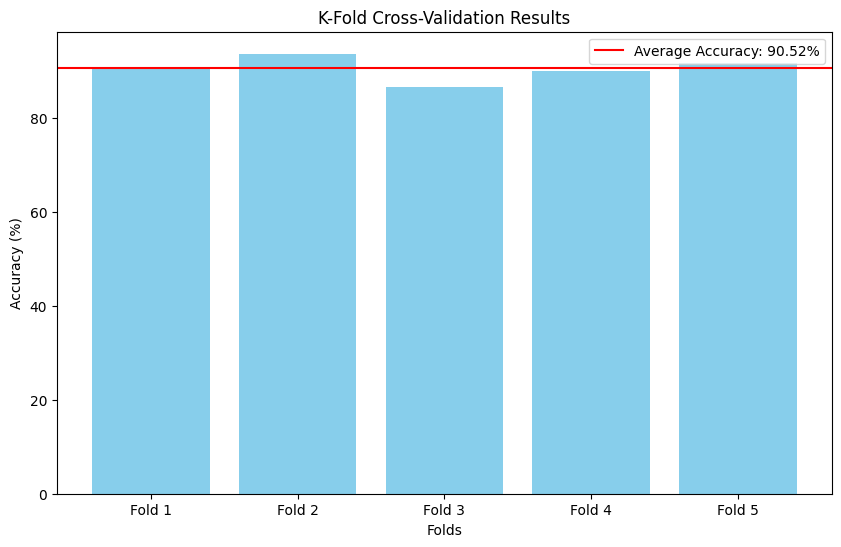

In [57]:
import matplotlib.pyplot as plt

# cvscores should contain the accuracy of each fold
# Example: cvscores = [90, 92, 88, 91, 89]

# Calculate average accuracy
average_accuracy = sum(cvscores) / len(cvscores)

# Generate fold labels
folds = [f'Fold {i+1}' for i in range(len(cvscores))]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(folds, cvscores, color='skyblue')
plt.axhline(y=average_accuracy, color='r', linestyle='-', label=f'Average Accuracy: {average_accuracy:.2f}%')

# Add title and labels
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Folds')
plt.ylabel('Accuracy (%)')
plt.legend()

# Display the plot
plt.show()
